#  ~Not working~

## Location-Based Data Frame: Reshape data frame such that location and mutations are both represented in feature columns

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('amino_acid_genotypes_to_brightness.tsv', sep = '\t', engine = 'python')
df.head()

,aaMutations,uniqueBarcodes,medianBrightness,std
0,NaN,3645,3.719212,0.106992
1,SA108D,1,1.301030,NaN
2,SA108D:SN144D:SI186V:SM231T:SL234P,1,1.301031,NaN
3,SA108D:SY141N:SH146L:SE220G,1,1.301189,NaN
4,SA108G,2,3.708478,0.020613


In [3]:
mutants = df['aaMutations']       #split to list of aminoacids
mutants = mutants.str.split(':')
mutants = mutants[1:]
mutants.head()

1                                    [SA108D]
2    [SA108D, SN144D, SI186V, SM231T, SL234P]
3            [SA108D, SY141N, SH146L, SE220G]
4                                    [SA108G]
5            [SA108G, SK138M, SR166C, SL234P]
Name: aaMutations, dtype: object

Separating the 2ond entry to aaMut and position 

In [4]:
pd.Series(mutants[2])

0    SA108D
1    SN144D
2    SI186V
3    SM231T
4    SL234P
dtype: object

In [5]:
mut_separated = pd.Series(mutants[2]).str.extract('(?P<position>^[A-Z]{2}\d+)(?P<mutation>[A-Z]$)')

mut_separated

C:\Users\Biel\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,position,mutation
0,SA108,D
1,SN144,D
2,SI186,V
3,SM231,T
4,SL234,P


Now that I know that this works lets do this for all the data!

In [6]:
mut_location = []
for i in xrange(1,len(mutants)):
    mut_location.append(pd.Series(mutants[i]).str.extract('(^[A-Z]{2}\d+)'))

C:\Users\Biel\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [7]:
df_mut_location = pd.DataFrame(mut_location)
df_mut_location.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,SA108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SA108,SN144,SI186,SM231,SL234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SA108,SY141,SH146,SE220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SA108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA108,SK138,SR166,SL234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


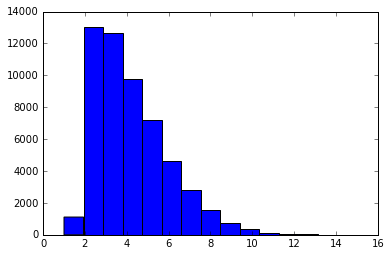

In [8]:
boleans_test = ~df_mut_location.isnull()
boleans_test_hist = boleans_test.sum(axis = 1)

plt.figure()
plt.hist(boleans_test_hist, bins=15)
plt.show()

Great, the locations df looks good in terms of the number of mutations per row.

Keep going

In [9]:
uniq_mut_los=np.unique(df_mut_location.values.ravel()) # unique values of locations

uniq_mut_los = uniq_mut_los[1:] #droping the NaN entry 
len(uniq_mut_los)

C:\Users\Biel\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


233

In [10]:
cols = uniq_mut_los.tolist()  #unique values of locations -> new columns

In [13]:
len(cols)

233

In [34]:
categ_mat = np.zeros((len (df_mut_location), len (cols)))

for i in xrange(len(df_mut_location)):
    for j in xrange(len(cols)):
        if cols[j] in df_mut_location.values[i]:
            categ_mat[i,j]=1
        else:
            categ_mat[i,j]=0
            

In [36]:
categ_mat.shape

(54023L, 233L)

Looks like the loop worked! Lets test if the histogram of ones i the matrix looks like the histogram of number of mutations per row.

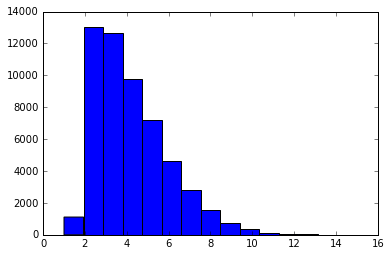

In [39]:
plt.figure()
plt.hist(categ_mat.sum(axis=1), bins=15)
plt.show()

In [41]:
all(boleans_test_hist == categ_mat.sum(axis=1)) #out: TRUE!

True

Now build the DataFrame

In [ ]:
locations_df = pd.DataFrame(categ_mat, columns=cols)